In [75]:
import sys
sys.path.append('../../astro_tools')
sys.path.append('../')
from astropy.io import fits
from astropy.wcs import wcs
from astropy import units as u
from spectral_cube import SpectralCube
from tqdm import tqdm
import cmasher as cmr
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from reproject import reproject_interp
from scipy.ndimage.filters import gaussian_filter

import numpy as np
import routine
from axes_offset import *
from fit_parabola import *
from velocity_conversions import *

# set up the plot
plt.rcParams['text.usetex'] = False
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.5
plt.rcParams["axes.labelweight"] = 'bold'
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams["font.family"] = "courier new"
plt.rcParams["font.style"] = "normal"
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["font.weight"] = 'bold'

Afont = {
        'family' : 'courier new',
        'color':  'black',
        'size': 25,
        }

Afontc = {
        'family' : 'courier new',
        'color':  'gray',
        'size': 20,
        }

Afontc_v2 = {
        'family' : 'courier new',
        'color':  'black',
        'size': 20,
        'alpha' : 0.8
        }

In [43]:
c = 3*10**5 * u.km/u.s
Vsys = 243. * u.km/u.s

SE

In [44]:
# savepath_ha = '../../ngc253/muse/Nov28/extinction/Halpha'
# cube = routine.CreateCube('../../ngc253/muse/data/ADP.2018-11-22T21_29_46.157.fits', 
#            6500, 6800, 6525, 6620, 6700, 6750)
# restwvl = 6562.801*u.AA * (Vsys + c)/c # H-alpha

# peakLower = velocity_to_wavelength(-400, restwvl, convention='optical').to_value()
# peakUpper = velocity_to_wavelength(400, restwvl, convention='optical').to_value()

# get_amp(cube, peakLower, peakUpper, plotLower=6540, plotUpper=6600, savepath=savepath_ha, n=100)

# # === === === === === === === === === === === === === === === === === === === === === === === === 
# savepath_hb = '../../ngc253/muse/Nov28/extinction/Hbeta'
# cube = routine.CreateCube('../../ngc253/muse/data/ADP.2018-11-22T21_29_46.157.fits', 
#            4800, 5000, 4800, 4820, 4900, 5000)
# restwvl = 4861.363*u.AA * (Vsys + c)/c # H-beta

# peakLower = velocity_to_wavelength(-400, restwvl, convention='optical').to_value()
# peakUpper = velocity_to_wavelength(400, restwvl, convention='optical').to_value()

# get_amp(cube, peakLower, peakUpper, plotLower=4850, plotUpper=4900, savepath=savepath_hb, n=100)

NW

In [45]:
# savepath_ha = '../../ngc253/muse/NW/Jan22/extinction/Halpha'
# cube = routine.CreateCube('../../ngc253/muse/data/ADP.2019-08-24T09_53_08.548.fits', 
#            6500, 6800, 6525, 6620, 6700, 6750)
# restwvl = 6562.801*u.AA * (Vsys + c)/c # H-alpha

# peakLower = velocity_to_wavelength(-400, restwvl, convention='optical').to_value()
# peakUpper = velocity_to_wavelength(400, restwvl, convention='optical').to_value()

# get_amp(cube, peakLower, peakUpper, plotLower=6540, plotUpper=6600, savepath=savepath_ha, n=100)

# # === === === === === === === === === === === === === === === === === === === === === === === === 
# savepath_hb = '../../ngc253/muse/NW/Jan22/extinction/Hbeta'
# cube = routine.CreateCube('../../ngc253/muse/data/ADP.2019-08-24T09_53_08.548.fits', 
#            4800, 5000, 4800, 4820, 4900, 5000)
# restwvl = 4861.363*u.AA * (Vsys + c)/c # H-beta

# peakLower = velocity_to_wavelength(-400, restwvl, convention='optical').to_value()
# peakUpper = velocity_to_wavelength(400, restwvl, convention='optical').to_value()

# get_amp(cube, peakLower, peakUpper, plotLower=4850, plotUpper=4900, savepath=savepath_hb, n=100)

In [49]:
NIIfilename = '../../ngc253/muse/data/ADP.2018-11-22T21_29_46.157.fits'
NII_SE = fits.open(NIIfilename)[1]
z, y, x = NII_SE.shape

NIIfilename_NW = '../../ngc253/muse/data/ADP.2019-08-24T09_53_08.548.fits'
NII_NW = fits.open(NIIfilename_NW)[1]

se_extent = get_extent(NII_SE.data, 2, 1, 0.2)
nw_extent = get_extent(NII_NW.data, 2, 1, 0.2)

se_ra_hms, se_dec_dms = get_offset(NII_SE.data, wcs.WCS(NII_SE.header, naxis=2).celestial)
nw_ra_hms, nw_dec_dms = get_offset(NII_NW.data, wcs.WCS(NII_NW.header, naxis=2).celestial)

# get the contours
miri_file = fits.open('../../ngc253/jwst/data/miri/ngc253_F770W_kdg_15nov23.fits')
miri = miri_file[1].data

miri_reproj_nw, _ = reproject_interp((miri, wcs.WCS(miri_file[1].header)), 
                                     wcs.WCS(NII_NW.header, naxis=2).celestial, shape_out=(y,x))
miri_smooth_nw = gaussian_filter(miri_reproj_nw, 4)

miri_reproj_se, _ = reproject_interp((miri, wcs.WCS(miri_file[1].header)), 
                                     wcs.WCS(NII_SE.header, naxis=2).celestial, shape_out=(y,x))
miri_smooth_se = gaussian_filter(miri_reproj_se, 4)

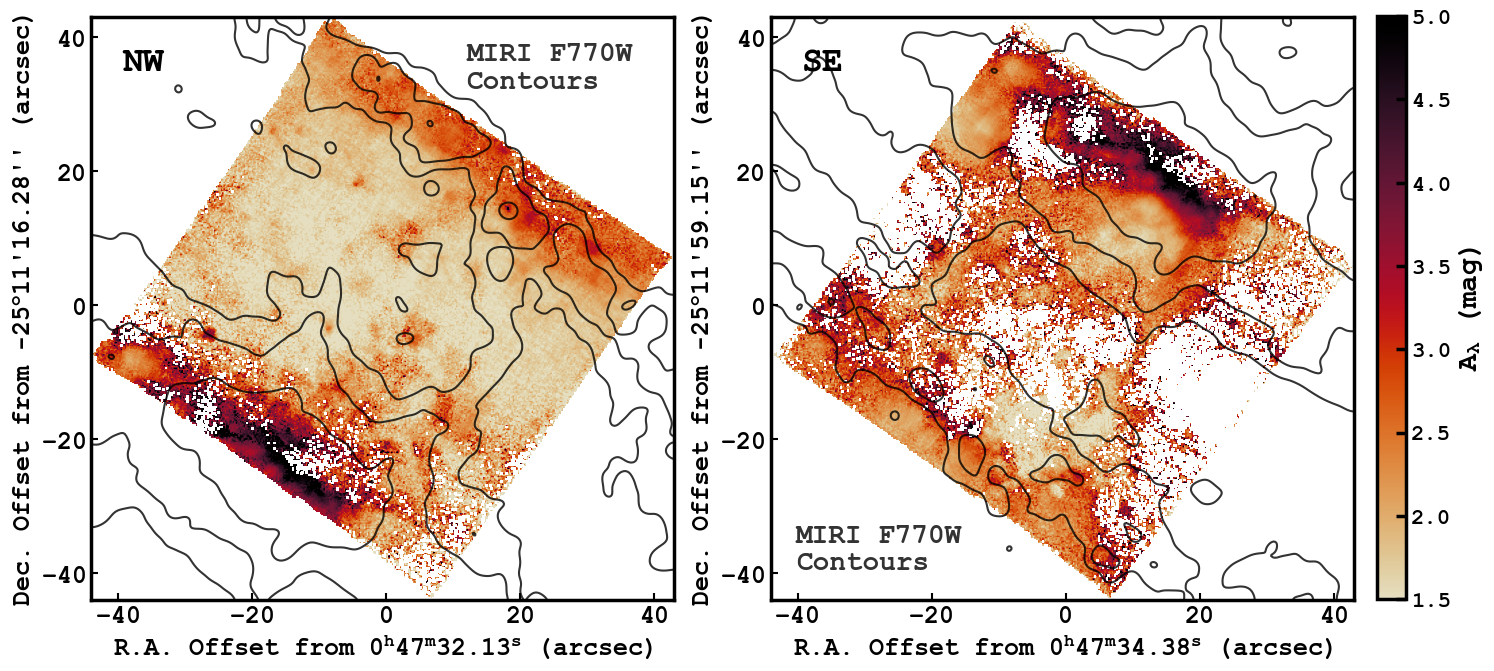

In [73]:
# read in data
ha_se_file = fits.open('../../ngc253/muse/Nov28/extinction/Halpha/amp.fits')
hb_se_file = fits.open('../../ngc253/muse/Nov28/extinction/Hbeta/amp.fits')
se_rat = ha_se_file[0].data[0] / hb_se_file[0].data[0]
se_mag = 2.5*np.log10(se_rat)
# se_mag[~np.isfinite(se_mag)] = 1e6
# se_mag[~np.isfinite(NII.data[0])] = np.nan

ha_nw_file = fits.open('../../ngc253/muse/NW/Jan22/extinction/Halpha/amp.fits')
hb_nw_file = fits.open('../../ngc253/muse/NW/Jan22/extinction/Hbeta/amp.fits')
nw_rat = ha_nw_file[0].data[0] / hb_nw_file[0].data[0]
nw_mag = 2.5*np.log10(nw_rat)
# nw_mag[~np.isfinite(nw_mag)] = 1e6
# nw_mag[~np.isfinite(NII_NW.data[0])] = np.nan

# set plot parameters
# cmap = cmr.get_sub_cmap('cmr.tropical_r', 0.1, 0.90)
cmap = cmr.get_sub_cmap('cmr.sunburst_r', 0.1, 1)
# cmap.set_over('purple')
vmin=1.5
vmax=5
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

# ============================================================================================================
im = ax1.imshow(nw_mag, origin='lower', vmin=vmin, vmax=vmax, cmap=cmap, extent=extent)
ax1.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=18, length=5, color='black')
ax1.set_xticks([-40, -20, 0, 20, 40])
ax1.set_yticks([-40, -20, 0, 20, 40])
ax1.set_ylabel('Dec. Offset from %s (arcsec)' % nw_dec_dms, fontsize=18)
ax1.set_xlabel('R.A. Offset from %s (arcsec)' % nw_ra_hms, fontsize=18)

at = AnchoredText('NW', prop=Afont, frameon=False, loc='upper left')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at)

ax1.contour(miri_smooth_nw, extent=extent,linewidths=1.5,
       levels=[30,50,154.519], 
       colors='black',zorder=4, alpha=0.8)

at = AnchoredText('MIRI F770W \nContours', prop=Afontc_v2, frameon=False, loc='upper right')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at)

# ============================================================================================================

im = ax2.imshow(se_mag, origin='lower', vmin=vmin, vmax=vmax, cmap=cmap, extent=extent)
ax2.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=18, length=5, color='black')
ax2.set_xticks([-40, -20, 0, 20, 40])
ax2.set_yticks([-40, -20, 0, 20, 40])
ax2.set_ylabel('Dec. Offset from %s (arcsec)' % se_dec_dms, fontsize=18)
ax2.set_xlabel('R.A. Offset from %s (arcsec)' % se_ra_hms, fontsize=18)

at = AnchoredText('SE', prop=Afont, frameon=False, loc='upper left')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax2.add_artist(at)

at = AnchoredText('MIRI F770W \nContours', prop=Afontc_v2, frameon=False, loc='lower left')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax2.add_artist(at)

ax2.contour(miri_smooth_se, extent=extent,linewidths=1.5,
       levels=[30,50,154.519], 
       colors='black',zorder=4, alpha=0.8)

cax = ax2.inset_axes([1.04, 0.002, 0.05, 1])  # make another axis for the colorbar 
                                                 # [x0, y0, width, height] where x0, y0 = lower left corner
bar = fig.colorbar(im, ax=ax2, cax=cax)
bar.set_label(r'A$_{\lambda}$ (mag)', fontsize=20)
bar.ax.tick_params(width=2.5, labelsize=16, length=7, direction='in')

# ============================================================================================================
# fig.supylabel('Dec. Offset from %s (arcsec)' % dec_dms, fontsize=18, family='courier new', weight='bold', style='normal')
plt.tight_layout()
# plt.subplots_adjust(wspace=-0.05, hspace=0)
plt.savefig('../../ngc253/muse/visuals/full_extinction.png', bbox_inches='tight', dpi=200)
plt.savefig('../../ngc253/muse/visuals/full_extinction.pdf', bbox_inches='tight', dpi=200)
plt.show()

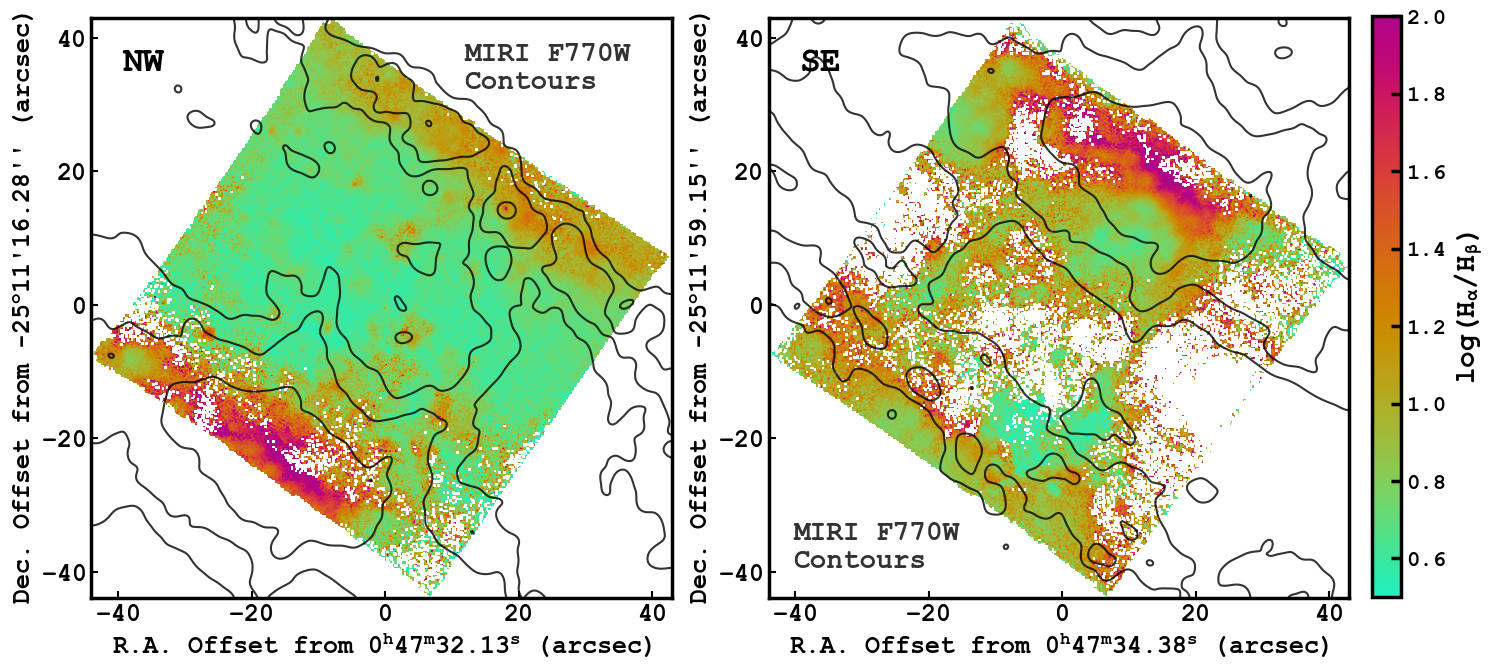

In [76]:
# read in data
ha_hb_rat_se = ha_se_file[0].data[0] / hb_se_file[0].data[0]
ha_hb_rat_nw = ha_nw_file[0].data[0] / hb_nw_file[0].data[0]

# set plot parameters
cmap = cmr.get_sub_cmap('cmr.tropical_r', 0.1, 0.90)
vmin=0.5
vmax=2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

# ============================================================================================================
im = ax1.imshow(np.log10(ha_hb_rat_nw), origin='lower', vmin=vmin, vmax=vmax, cmap=cmap, extent=extent)
ax1.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=18, length=5, color='black')
ax1.set_xticks([-40, -20, 0, 20, 40])
ax1.set_yticks([-40, -20, 0, 20, 40])
ax1.set_ylabel('Dec. Offset from %s (arcsec)' % nw_dec_dms, fontsize=18)
ax1.set_xlabel('R.A. Offset from %s (arcsec)' % nw_ra_hms, fontsize=18)

at = AnchoredText('NW', prop=Afont, frameon=False, loc='upper left')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at)

ax1.contour(miri_smooth_nw, extent=extent,linewidths=1.5,
       levels=[30,50,154.519], 
       colors='black',zorder=4, alpha=0.8)

at = AnchoredText('MIRI F770W \nContours', prop=Afontc_v2, frameon=False, loc='upper right')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at)

# ============================================================================================================

im = ax2.imshow(np.log10(ha_hb_rat_se), origin='lower', vmin=vmin, vmax=vmax, cmap=cmap, extent=extent)
ax2.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=18, length=5, color='black')
ax2.set_xticks([-40, -20, 0, 20, 40])
ax2.set_yticks([-40, -20, 0, 20, 40])
ax2.set_ylabel('Dec. Offset from %s (arcsec)' % se_dec_dms, fontsize=18)
ax2.set_xlabel('R.A. Offset from %s (arcsec)' % se_ra_hms, fontsize=18)

at = AnchoredText('SE', prop=Afont, frameon=False, loc='upper left')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax2.add_artist(at)

ax2.contour(miri_smooth_se, extent=extent,linewidths=1.5,
       levels=[30,50,154.519], 
       colors='black',zorder=4, alpha=0.8)

at = AnchoredText('MIRI F770W \nContours', prop=Afontc_v2, frameon=False, loc='lower left')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax2.add_artist(at)

cax = ax2.inset_axes([1.04, 0.002, 0.05, 1])  # make another axis for the colorbar 
                                                 # [x0, y0, width, height] where x0, y0 = lower left corner
bar = fig.colorbar(im, ax=ax2, cax=cax)
bar.set_label(r'log(H$_{\alpha}$/H$_{\beta}$)', fontsize=20)
bar.ax.tick_params(width=2.5, labelsize=16, length=7, direction='in')

# ============================================================================================================
# fig.supylabel('Dec. Offset from %s (arcsec)' % dec_dms, fontsize=18, family='courier new', weight='bold', style='normal')
plt.tight_layout()
# plt.subplots_adjust(wspace=-0.05, hspace=0)
plt.savefig('../../ngc253/muse/visuals/ha_hb.png', bbox_inches='tight', dpi=200)
plt.savefig('../../ngc253/muse/visuals/ha_hb.pdf', bbox_inches='tight', dpi=200)
plt.show()